## Data Preparation

In [ ]:
from google.colab import files
_ = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download 'paultimothymooney/chest-xray-pneumonia'

100% 2.29G/2.29G [01:03<00:00, 42.1MB/s]
100% 2.29G/2.29G [01:03<00:00, 38.7MB/s]


In [ ]:
!unzip -qq chest-xray-pneumonia.zip

In [ ]:
!ls ./chest_xray/train/NORMAL | wc -l

1341


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
train_dataset = image_dataset_from_directory(
    "chest_xray/train",
    image_size=(180, 180),
    batch_size=32,
    label_mode='categorical')

valid_dataset = image_dataset_from_directory(
    "chest_xray/val",
    image_size=(180, 180),
    batch_size=8,
    label_mode='categorical')

test_dataset = image_dataset_from_directory(
    "chest_xray/test",
    image_size=(180, 180),
    batch_size=32,
    label_mode='categorical')

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


(32, 180, 180, 3)
(32, 1)


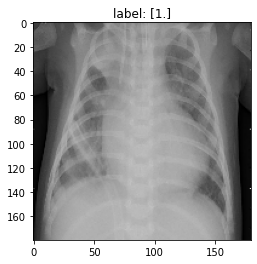

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for item in train_dataset:
  print(item[0].shape)
  print(item[1].shape)

  input_shape = item[0][0].shape

  img = np.array(item[0][0], dtype='int32')
  plt.imshow(img)
  plt.title('label: ' + str(item[1][0].numpy()))
  plt.show()

  break

In [ ]:
input_shape

TensorShape([180, 180, 3])

## Model Design

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
model_full = Sequential(
    [
        layers.Normalization(),
        base_model,
        layers.GlobalAvgPool2D(),
        layers.Dense(50, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(2, activation='softmax')
    ]
)

In [ ]:
model_full.compile(loss=losses.categorical_crossentropy,
                   optimizer=optimizers.Adam(),
                   metrics=["accuracy"])

## Training

In [ ]:
history = model_full.fit(train_dataset,
                         epochs=10,
                         validation_data=test_dataset)

Epoch 1/10
163/163 [==============================] - 55s 326ms/step - loss: 0.3986 - accuracy: 0.8982 - val_loss: 0.5027 - val_accuracy: 0.8221
Epoch 2/10
163/163 [==============================] - 79s 480ms/step - loss: 0.1369 - accuracy: 0.9427 - val_loss: 0.5594 - val_accuracy: 0.8253
Epoch 3/10
163/163 [==============================] - 43s 259ms/step - loss: 0.1039 - accuracy: 0.9572 - val_loss: 0.6297 - val_accuracy: 0.7949
Epoch 4/10
163/163 [==============================] - 41s 246ms/step - loss: 0.0920 - accuracy: 0.9651 - val_loss: 0.6671 - val_accuracy: 0.7933
Epoch 5/10
163/163 [==============================] - 43s 257ms/step - loss: 0.0749 - accuracy: 0.9699 - val_loss: 0.6490 - val_accuracy: 0.8093
Epoch 6/10
163/163 [==============================] - 52s 311ms/step - loss: 0.0646 - accuracy: 0.9753 - val_loss: 0.7846 - val_accuracy: 0.7933
Epoch 7/10
163/163 [==============================] - 72s 435ms/step - loss: 0.0606 - accuracy: 0.9764 - val_loss: 0.8892 - val_ac

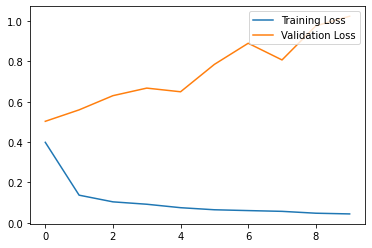

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
history2 = model_full.fit(train_dataset,
                          epochs=20,
                          validation_data=test_dataset,
                          initial_epoch=10)

Epoch 11/20
163/163 [==============================] - 63s 377ms/step - loss: 0.0445 - accuracy: 0.9818 - val_loss: 0.9317 - val_accuracy: 0.7997
Epoch 12/20
163/163 [==============================] - 43s 256ms/step - loss: 0.0372 - accuracy: 0.9849 - val_loss: 1.1009 - val_accuracy: 0.7885
Epoch 13/20
163/163 [==============================] - 61s 366ms/step - loss: 0.0419 - accuracy: 0.9839 - val_loss: 0.8116 - val_accuracy: 0.8317
Epoch 14/20
163/163 [==============================] - 43s 249ms/step - loss: 0.0383 - accuracy: 0.9841 - val_loss: 0.8725 - val_accuracy: 0.8317
Epoch 15/20
163/163 [==============================] - 32s 188ms/step - loss: 0.0348 - accuracy: 0.9872 - val_loss: 1.1283 - val_accuracy: 0.7853
Epoch 16/20
163/163 [==============================] - 51s 309ms/step - loss: 0.0359 - accuracy: 0.9864 - val_loss: 1.2593 - val_accuracy: 0.7885
Epoch 17/20
163/163 [==============================] - 32s 191ms/step - loss: 0.0317 - accuracy: 0.9873 - val_loss: 0.8940 -

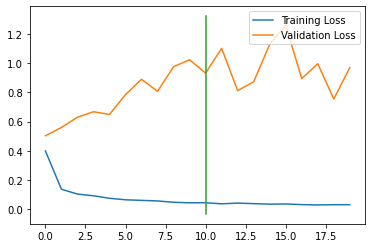

In [ ]:
_loss = history.history['loss'] + history2.history['loss']
_val_loss = history.history['val_loss'] + history2.history['val_loss']
plt.plot(_loss, label='Training Loss')
plt.plot(_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.plot([10, 10], 
         plt.ylim(), label='Start Fine Tuning Conv Blocks')